PROJECT TITLE- SMART FLOOD MONITORING AND DISASTER MANAGEMENT FRAMEWORK

PROBLEM STATEMENT- Significant losses of lives, property, and resources are caused by floods, frequently as a result of inadequate preparation and delayed alerts. Communities are left extremely exposed because traditional monitoring systems have trouble integrating real-time data and making accurate predictions. Disaster response becomes ineffective and reactive rather than preventive in the absence of prompt risk assessments and actionable insights. Therefore, a clever, technologically advanced framework that facilitates efficient flood monitoring and disaster management is desperately needed.

DESCRIPTION- A technology-driven system called the Smart Flood Monitoring and Disaster Management Framework was created to effectively anticipate, track, and control flood-related risks. To deliver precise early warnings, it combines real-time sensor data, weather predictions, and satellite photos. The system determines vulnerable areas, evaluates risk levels, and makes sure that notifications are promptly distributed to communities and authorities using intelligent analytics. It provides a comprehensive solution for lessening the effects of floods by supporting crisis management tasks like evacuation planning, resource allocation, and post-flood rehabilitation in addition to warnings.

✅ Dataset Loaded Successfully

🔍 First Rows of Data:
             district  fatalities  no_of_camps  actual_rainfall_in_mm  \
0  Thiruvananthapuram          11           94                  373.8   
1              Kollam           5          168                  644.1   
2      Pathanamthitta           3         4352                  764.9   
3           Alappuzha          43         2126                  608.2   
4            Kottayam          14          788                  619.2   

   normal_rainfall_in_mm  no_of_landslides  full_damaged_houses  
0                  142.0                 0                  111  
1                  258.7                 2                   95  
2                  352.7                 8                  741  
3                  343.1                 0                 2075  
4                  386.0                29                   76  

ℹ Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 7 col

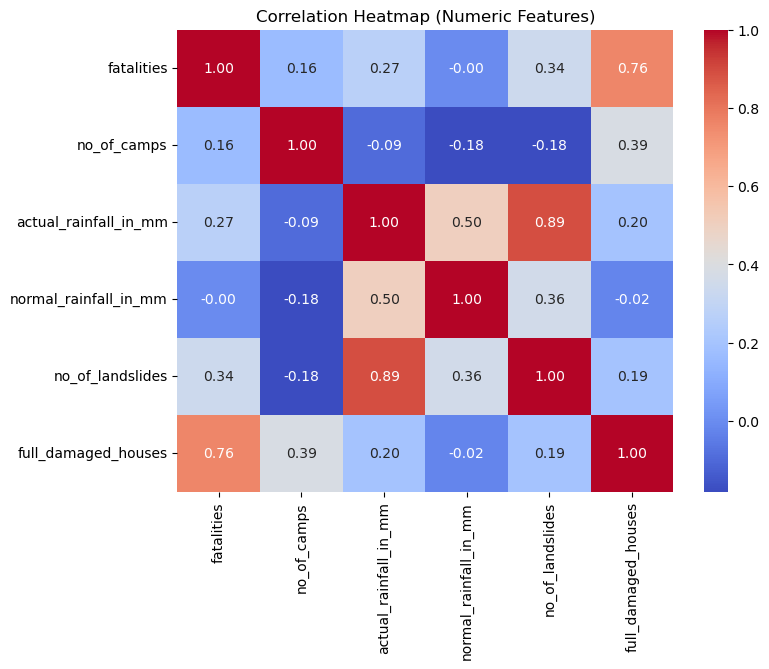

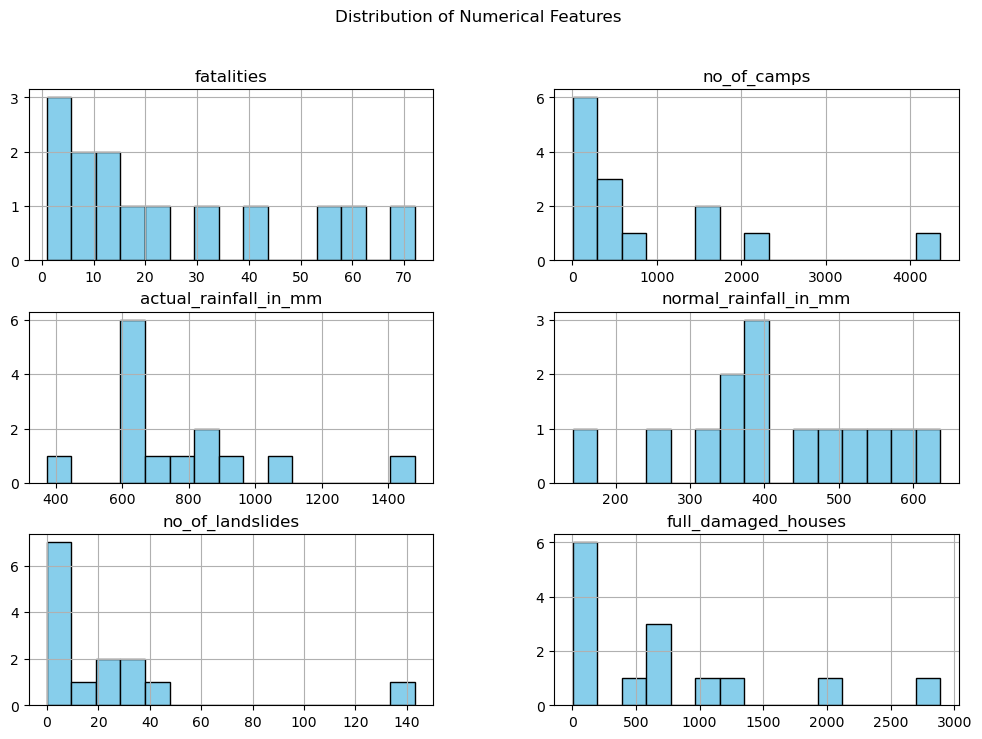


✅ Data Transformation Completed

📌 Correlation of Features with Target ( fatalities ):
fatalities                     1.000000
full_damaged_houses            0.756482
district_Thrissur              0.589169
district_Ernakulam             0.416558
district_Idukki                0.367240
no_of_landslides               0.339855
actual_rainfall_in_mm          0.270584
no_of_camps                    0.164555
district_Malappuram            0.071334
normal_rainfall_in_mm         -0.004648
district_Palakkad             -0.051960
district_Kozhikode            -0.101277
district_Kottayam             -0.125936
district_Thiruvananthapuram   -0.162924
district_Wayanad              -0.224571
district_Kannur               -0.224571
district_Kollam               -0.236901
district_Pathanamthitta       -0.261560
district_Kasaragode           -0.286218
Name: fatalities, dtype: float64


In [3]:


# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
#load dataset
data = pd.read_csv("metadata.csv")
print("✅ Dataset Loaded Successfully")

# Exploratory Data Analysis (EDA)
print("\n🔍 First Rows of Data:")
print(data.head())

print("\nℹ Dataset Info:")
print(data.info())

print("\n📊 Summary Statistics:")
print(data.describe())

print("\n❓ Missing Values:")
print(data.isnull().sum())

#  Graph 1: Correlation Heatmap 
plt.figure(figsize=(8,6))
sns.heatmap(data.drop(columns=["district"]).corr(), cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()

#  Graph 2: Histogram of Numerical Features 
num_cols = data.drop(columns=["district"]).select_dtypes(include=[np.number]).columns
data[num_cols].hist(bins=15, figsize=(12,8), color="skyblue", edgecolor="black")
plt.suptitle("Distribution of Numerical Features")
plt.show()

# Data Transformation 
# Encode categorical column
data_encoded = pd.get_dummies(data, columns=["district"], drop_first=True)

# Separate target & features
target = "fatalities"   # 👈 you can also try "full_damaged_houses"
X = data_encoded.drop(columns=[target])
y = data_encoded[target]

# Scale features
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

print("\n✅ Data Transformation Completed")

#  Feature Selection 
print("\n📌 Correlation of Features with Target (", target, "):")
print(data_encoded.corr()[target].sort_values(ascending=False))